# Part 1: Theory

## Mixed  formulation for incompressible elasticity

For the compressible elasticity problem, we shall let the material be an isotropic linear elastic body. With deformation governed by the equilibrium equation and Saint-Venant Kirchhoff material law.

The governing equations and boundary conditions are:

\begin{align}
\label{eq:momentum}-\textrm{div} \boldsymbol{\sigma(u)} = \boldsymbol{f} & \quad \textrm{in}\; \Omega \\
\label{eq:dirichlet}\boldsymbol{u} = \boldsymbol{\bar{u}} & \quad \textrm{on}\; \partial\Omega_u, \\
\label{eq:neumann}\boldsymbol{\sigma \cdot n} = \boldsymbol{t} & \quad \textrm{on}\; \partial\Omega_n,
\end{align}


With Hooke's constitutive equation defined as:

\begin{align}
\label{eq:constitutive}\boldsymbol{\sigma} = \lambda tr(\boldsymbol{\varepsilon(u)})\boldsymbol{I} + 2 \mu\boldsymbol{\varepsilon(u)}
\end{align}

Where $\boldsymbol{\sigma}$ is the Cauchy stress, $\boldsymbol{\varepsilon}$ is the strain, $\boldsymbol{\varepsilon(u)}= \frac{1}{2}(\nabla\boldsymbol{u}+[\nabla\boldsymbol{u}]^t)$. The Lame constants $\lambda$ and $\mu$ are related through Young's modulus $E$ and the Poisson ratio $\nu$:

\begin{align}
\label{eq:lamelambda}\lambda = \frac{\nu E}{(1 + \nu)(1 - 2\nu)}
\end{align}

\begin{align}
\label{eq:lamemu}\mu = \frac{E}{2(1 + \nu)}
\end{align}

The problem above of compressible elasticity is solved using finite elements. However, for the incompressible state (where $\nu$ = 0.5), a mixed formulation of the linear elastic problem can be solved through the addition of a new unknown for pressure, $p$. With $p = \lambda \textrm{div}\boldsymbol{u}$, the constitutive relation is now defined as:

\begin{align}
\label{eq:incompressible}\boldsymbol{\sigma} = 2 \mu\boldsymbol{\varepsilon} + \lambda \textrm{div}\boldsymbol{u}\boldsymbol{I} = 2 \mu\boldsymbol{\varepsilon} + p\boldsymbol{I}
\end{align}

And to the strong form of the incompressible problem we add the equation:

\begin{align}
\label{eq:incompressiblestrong}-\textrm{div} \boldsymbol{u} + \frac{1}{\lambda} p = 0 & \quad \textrm{in}\; \Omega
\end{align}

As is standard for galerkin finite elements, we multiply Eqs. \eqref{eq:momentum} and \eqref{eq:incompressiblestrong} by the appropriate testing function $\delta\mathbf{u}$ and $\delta p$ and integrate over the domain $\Omega$.

\begin{align}
\label{eq:momentum_int} 2\mu\int_{\Omega}\mathbf{\varepsilon (u)}:\mathbf{\varepsilon(\delta u)} \,\textrm{d}\Omega + \int_{\Omega}p \,\textrm{div}\,\delta\mathbf{u} \,\textrm{d}\Omega &= \int_{\Omega}\delta\mathbf{u}\cdot\mathbf{f}\,\textrm{d}\Omega + \int_{\partial\Omega}\delta\mathbf{u}\cdot\mathbf{t}\,\textrm{d}\partial\Omega \\
\int_{\Omega}\textrm{div}\,\mathbf{u}\,\delta p \,\textrm{d}\Omega -\int_{\Omega}\frac{1}{\lambda} p\, \delta p\,\textrm{d}\Omega  &= 0 
\end{align}


\begin{align}
\mathbf{A} = 2\mu\int_{\Omega}\mathbf{\varepsilon (u)}:\mathbf{\varepsilon(\delta u)}\,\textrm{d}\Omega 
\end{align}

\begin{align}
\mathbf{C^T} = \int_{\Omega}\textrm{div}\,\mathbf{ u}\,\delta p\,\textrm{d}\Omega 
\end{align}

\begin{align}
\mathbf{B} = -\int_{\Omega}\frac{1}{\lambda} p\, \delta p\,\textrm{d}\Omega 
\end{align}

\begin{align}
\mathbf{F} = \int_{\Omega}\delta\mathbf{u}\cdot\mathbf{f}\,\textrm{d}\Omega + \int_{\partial\Omega}\delta\mathbf{u}\cdot\mathbf{t}\,\textrm{d}\partial\Omega
\end{align}

The global linear system of equations is:

\begin{align}
\begin{bmatrix}
{\bf{A}} & {\bf{C}} \\
{\bf{C^T}} & {\bf{B}}
\end{bmatrix}
\begin{bmatrix}
\bf{u} \\
\bf{p} \\
\end{bmatrix}
= -
\begin{bmatrix}
{\bf{F}} \\
{\bf{0}} \\
\end{bmatrix}
\end{align}

Where the lower right diagonal block of our matrix, ${\bf{B}} = 0$. Resulting in the well-known saddle point problem. Careful choice has to be made for the finite elements chosen for displacement and pressure fields to ensure that the discrete problem has a good solution since the inf-sup condition has to be satisfied. 

One element in particular that can be adopted is the simple Taylor-Hood element. Whereby both displacement and pressure fields are continuous in Sobolev $H^1$ functional space. One must note that the displacement field must be larger by one polynomial order than the pressure field to achieve inf-sup stability ($P_k - P_{k-1}$ for $k \geq 2$). See [[Boffi, 2013]](#boffi_2013) for more on Taylor-Hood elements.


Another element that can be utilised is the Crouzeix-Raviart element. With this element the displacement is approximated in Sobolev $H^1$ functional space and the pressure field is discontinuous in $L^2$ space. Two orders difference is required between displacement and pressure fields ($P_k - P_{k-2}$) for stability. For the 2D case, $k \geq 2$ is sufficient but for 3D where we require degrees of freedom on the faces, $k \geq 3$.

### References: 

<a id='boffi_2013'></a> 
**[Boffi, 2013]** Boffi D, Brezzi F, Fortin M. Mixed finite element methods and applications, Springer, 2013


# Example: Cook's membrane

To demonstrate the discussed above, implementation of mixed incompressible elasticity is applied to the Cook's membrane problem. Both the Taylor-Hood and Crouzeix-Raviart elements are considered as separate analyses for comparison.

In this problem the beam is subjected to a boundary force on the right hand side edge undergoing deformation. This is a typical example in solid mechanics for nearly incompressible and compressible analysis. 

<div>
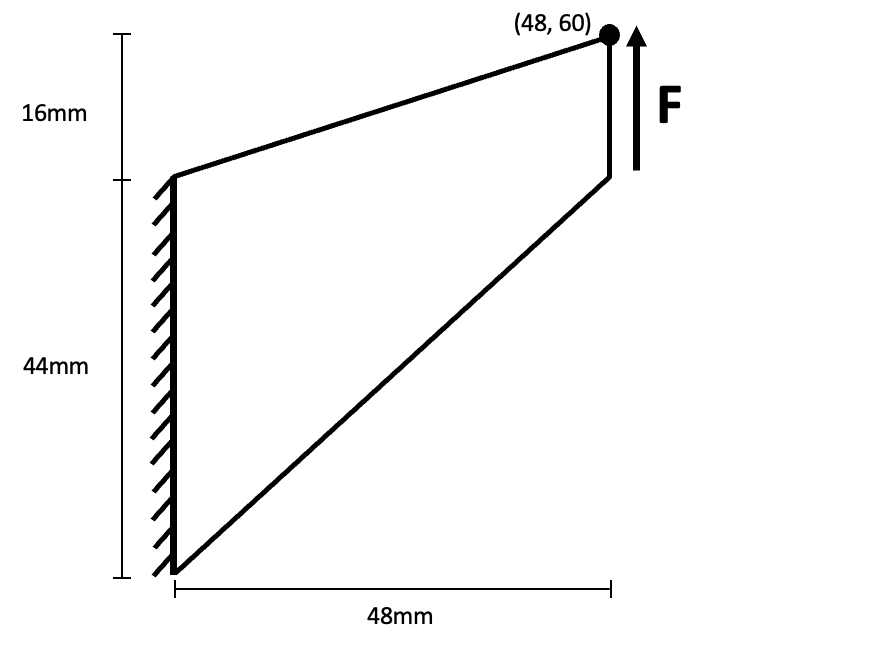
<a id='fig_1'></a> 
    <center><b>Fig. 1. Cook's membrane.</b></center>

FIXME: Commented text
<!-- First, we will verify the implementation by running the code without the refinement loop:
\code
./mixed_poisson -file_name test.h5m -base_order 2
\endcode
Using meshes with different element sizes and setting different approximation orders, we can study the convergence of e.g. field \f$u\f$, see \ref mixed_poisson_figure_2 "Figure 2(a)", which for the considered mixed formulation satisfies the following <em>a priori</em> error bound, see \cite boffi2013mixed
\f[
||u^h-u^*||_{\Omega}\leq C(u,\mathbf{q})\,h^{p}
\f]
where \f$h\f$ is the element size, \f$p\f$ is approximation order for fluxes field \f$\mathbf{q}\f$ and order for field \f$u\f$ is \f$(p-1)\f$. 

\anchor mixed_poisson_figure_2
\image html conv_study.pdf "Figure 2: L2 error of the numerical solution for different approximations orders with respect to (a) element size, (b) number of DOFs" width=1000px

Furthermore, we can plot the values of the local errors and local error indicators \f$\eta_e\f$, given by \eqref{eq:indic}. \ref mixed_poisson_figure_3 "Figure 3" shows that the considered error indicator (difference between the gradient of field u and the flux) is very close to the H1 seminorm of the error computed using the analytical solution. Moreover, the indicator is very effective in highlighting the regions where the L2-norm of the solution is pronounced. 

\anchor mixed_poisson_figure_3
\image html error_indicators.jpg "Figure 3: Local error and error indicator" width=1000px

Next, we run the code invoking the adaptive p-refinement:
\code
./mixed_poisson -file_name test.h5m -base_order 2 -ref_iter_num 10
\endcode
In this case, we can observe coherent evolution of the approximation orders saved on element tags and the corresponding distribution of the error in the domain, see \ref mixed_poisson_figure_4 "Figure 4":

\anchor mixed_poisson_figure_4
\image html adaptive_refinement.gif "Figure 4: Approximation order and local error for several iterations of the adaptive p-refinement" width=1000px

Finally we extend the convergence analysis and plot the error as a function of number of DOFs used in simulation, see \ref mixed_poisson_figure_2 "Figure 2(b)". We can observe in this simple example the effectiveness of using the p-adaptivity, driven by the error indicator. Indeed, such an approach, which is increasing approximation order only in regions where the error is pronounced, requires much less DOFs then the approach based on global h- or p-refinement to obtain the same accuracy of the solution. -->

### Importing necessary modules, setting parameters and paths

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy import optimize
import time
import os
import os.path
import zipfile
import pandas as pd
from scipy.optimize import curve_fit, least_squares
import sys
# sys.path.append("/usr/local/lib/python3.8/site-packages/gmsh-4.8.3-Linux64-sdk/lib")
import gmsh
import math

import matplotlib.image as mpimg
import re

import pyvista as pv
import ipywidgets as widgets
pv.set_plot_theme("document")

# %load_ext autoreload
# %autoreload 2

plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = "Serif"
plt.rcParams['font.size'] = 20

from pyvirtualdisplay import Display
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()
    
user_name=!whoami # get user name
user_name=user_name[0]
um_view = "/mofem_install/jupyter/%s/um_view" % user_name

### Define utility functions (mesh generation, running the analysis, results post-processing)

In [ ]:
class AttrDict(dict):
    def __getattr__(self, attr):
        if attr in self:
            return self[attr]
        raise AttributeError(f"'AttrDict' object has no attribute '{attr}'")

# generate_config
def generate_config(params):
    # Open the file for writing
    with open(params.config_file, 'w') as f:
        # FIX_ALL boundary condition (do not change)
        data = ['[SET_ATTR_FIX_ALL]', 'number_of_attributes=2', 'user1=0', 'user2=0']
        # Use a for loop to write each line of data to the file
        for line in data:
            f.write(line + '\n')
            # print the data as it is written to the file
            print(line)
        # FORCE boundary condition (change in params bellow)
        data = ['[SET_ATTR_FORCE]', 'number_of_attributes=2', 'user1='+str(params.force_x), 
                'user2='+str(params.force_y)]
        # Use a for loop to write each line of data to the file
        for line in data:
            f.write(line + '\n')
            # print the data as it is written to the file
            print(line)
        # MAT_ELASTIC boundary condition (change in params bellow)
        data = ['[SET_ATTR_MAT_ELASTIC]', 'number_of_attributes=2', 'user1='+str(params.young_modulus), 
                'user2='+str(params.poisson_ratio)]
        # Use a for loop to write each line of data to the file
        for line in data:
            f.write(line + '\n')
            # print the data as it is written to the file
            print(line)



def generate_mesh(params):
    
    gmsh.initialize()
    
    tol = 0.1
    L = params.side_length

    point1 = gmsh.model.geo.addPoint(0, 0, 0, tol)
    point2 = gmsh.model.geo.addPoint(48, 44, 0, tol)
    point3 = gmsh.model.geo.addPoint(48, 60, 0, tol)
    point4 = gmsh.model.geo.addPoint(0, 44, 0, tol)

    line1 = gmsh.model.geo.addLine(point1, point2)
    line2 = gmsh.model.geo.addLine(point2, point3)
    line3 = gmsh.model.geo.addLine(point3, point4)
    line4 = gmsh.model.geo.addLine(point4, point1)
    
    curve_loop = gmsh.model.geo.addCurveLoop([line1, line2, line3, line4])
    plane_surface = gmsh.model.geo.addPlaneSurface([curve_loop])
    
    N = int(L / params.element_size) + 1
    
    gmsh.model.geo.mesh.setTransfiniteCurve(line1, N)
    gmsh.model.geo.mesh.setTransfiniteCurve(line2, N)
    gmsh.model.geo.mesh.setTransfiniteCurve(line3, N)
    gmsh.model.geo.mesh.setTransfiniteCurve(line4, N)
    gmsh.model.geo.mesh.setTransfiniteSurface(plane_surface)
    
    gmsh.model.geo.synchronize()
    
    if not params.triangle_mesh:
        gmsh.option.setNumber("Mesh.RecombineAll", 1)
    
    mat = gmsh.model.addPhysicalGroup(2, [plane_surface])
    gmsh.model.setPhysicalName(2, mat, 'MAT_ELASTIC')
    fixed = gmsh.model.addPhysicalGroup(1, [line4])
    gmsh.model.setPhysicalName(1, fixed, 'FIX_ALL')
    boundary_force = gmsh.model.addPhysicalGroup(1, [line2])
    gmsh.model.setPhysicalName(1, boundary_force, 'FORCE')
      
    gmsh.model.mesh.generate(2)
    
    med_file = params.mesh_file + ".med"
    gmsh.write(med_file)

    gmsh.finalize()
    
    h5m_file=params.mesh_file + ".h5m"    
    !read_med -med_file {med_file} -output_file {h5m_file} -log_sl error -meshsets_config {params.config_file}
    
    if params.show_mesh:
        vtk_file=params.mesh_file + ".vtk"
        !mbconvert {h5m_file} {vtk_file}

        mesh = pv.read(vtk_file)
        mesh_shrink = mesh.shrink(0.95)

        p = pv.Plotter(notebook=True)
        p.add_mesh(mesh_shrink, smooth_shading=False)

        p.camera_position = "xy"
        p.show(jupyter_backend='ipygany')
    
    return

def parse_log_file(params):
    res = AttrDict()
    with open(params.log_file, "r") as log_file:
        for line in log_file:
            line = line.strip()
            if "U_Y:" in line:
                res.disp = float(line.split()[6])
    return res

def run_mofem(params):
    
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    
    !{um_view}/bin/mofem_part -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    
    !rm -rf out*
        
    !export OMPI_MCA_btl_vader_single_copy_mechanism=none && \
    nice -n 10 mpirun --oversubscribe --allow-run-as-root \
    -np {params.nproc} {um_view}/tutorials/mix-2/{params.executable} \
    -file_name {params.part_file} \
    -order {params.order} \
    -is_discontinuous_pressure {params.is_discontinuous_pressure} \
    -ksp_monitor \
    -snes_monitor \
    -young_modulus {params.young_modulus} \
    -poisson_ratio {params.poisson_ratio} \
    -post_proc_vol 1 \
    -post_proc_skin 0 \
    -eps_stab 0. \
    -is_a_t_petsc_fieldsplit 1 \
    -pc_type lu \
    -field_eval_coords {params.evaluator_point} \
    -plane_strain 1 \
    -log_no_color 1 \
    2>&1 | tee {params.log_file}
    
    !convert.py -np {params.nproc} out* err*

    return parse_log_file(params)

def show_results(params):
    out_to_vtk = !ls -c1 {params.show_file}_*vtk
    last_file=out_to_vtk[0]

    mesh = pv.read(last_file[:-3] + "vtk")

    if params.show_edges:
        mesh=mesh.shrink(0.95)
        
    jupyter_backend='panel'
    cmap = "turbo"
    if params.show_file == "out":
        jupyter_backend='ipygany'
        if mesh.point_data[params.show_field].ndim > 1:
            cmap = "viridis"

    p = pv.Plotter(notebook=True)
    p.add_mesh(mesh, scalars=params.show_field, component=1, smooth_shading=True, cmap=cmap)
    p.camera_position = "xy"
    
    p.show(jupyter_backend=jupyter_backend)
    
def show_field(params):
    params.show_file = "out"
    show_results(params)
    
def show_error(params):
    params.show_file = "error"
    show_results(params)
    

### Dictionary defining all relevant parameters for solving the problem

In [ ]:
params = AttrDict() # Attribute dictionary for storing the parameters

# Pre-processing parameters
params.mesh_file = "mesh_2d" # no file extension needed
params.side_length = 16

params.element_size = 1 # element size in the regular mesh
params.triangle_mesh = True # False for quads
params.show_mesh = True

# boundary condition configuartion
params.config_file = "bc.cfg"
params.force_x = 0.
params.force_y = 6.25
params.young_modulus = 240.5656
params.poisson_ratio = 0.4999

# Solution parameters
params.executable = "incompressible_2d_schur" # incompressible_2d_petsc
params.log_file = "log" # log file name
params.nproc = 4
params.order = 2
params.is_discontinuous_pressure = 1
params.evaluator_point = 48,60

# Post-processing parameters
params.show_file = "out"
params.show_field = "U"
params.show_edges = True

### Generate a mesh

In [ ]:
params.show_mesh = True
generate_config(params)
generate_mesh(params)

### Run the analysis

In [ ]:
params.executable = "incompressible_2d_schur" # incompressible_2d_petsc ../vec-0/elastic_2d_petsc
params.is_discontinuous_pressure = 1
params.order = 2
run_mofem(params)

### Visualise the results

In [ ]:
params.show_field = "U"
params.show_edges = True
show_field(params)

In [ ]:
params.show_field = "P"
params.show_edges = True
show_field(params)

### Global convergence study

In [ ]:
L = params.side_length
elem_size_list = [8, 4, 2, 1, 0.5, 0.25]
elem_per_side = [L/x for x in elem_size_list]

#print(elem_per_side)

params.show_mesh = False
params.convert = False

res_crouzeix_raviart = []
res_taylor_hood = []

def get_disp_list(res_list):
    return [res.disp for res in res_list]
    
for elem_size in elem_per_side:
    
    params.element_size = elem_size
    params.evaluator_point = 48,60
    params.force_y = 6.25
    params.young_modulus = 240.5656
    params.poisson_ratio = 0.4999
    
    params.executable = "incompressible_2d_schur"
    params.order = 2
    params.is_discontinuous_pressure = 1
    generate_mesh(params)
    run_mofem(params)
    res_crouzeix_raviart.append(parse_log_file(params))
    
    params.executable = "incompressible_2d_petsc"
    params.order = 2
    params.is_discontinuous_pressure = 0
    generate_mesh(params)
    run_mofem(params)
    res_taylor_hood.append(parse_log_file(params))

### Plot the results

#### Element convergence study: Crouzeix-Raviart / Taylor-Hood

In [ ]:
plt.plot(elem_per_side, get_disp_list(res_crouzeix_raviart), marker='o', ms=8, lw=2, label="Crouzeix-Raviart")
plt.plot(elem_per_side, get_disp_list(res_taylor_hood), ls='--', ms=8, lw=2, label="Taylor-Hood")


plt.xlabel("Number of elements along boundary force edge")

plt.ylabel("Top right hand side corner displacement (mm)")


plt.grid(ls="--")

plt.title("Convergence study")

plt.legend()



plt.show()